In [44]:
from music21 import *

In [72]:
#defining function to read MIDI files
def read_midi(file):
    
    print("Loading Music File:",file)
    
    notes=[]
    notes_to_parse = None
    
    #parsing a midi file
    midi = converter.parse(file)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)

    #Looping over all the instruments
    for part in s2.parts:
    
        #select elements of only piano
        if 'Trumpet' in str(part): 
        
            notes_to_parse = part.recurse() 
      
            #finding whether a particular element is note or a chord
            for element in notes_to_parse:
                print(element)
                #note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                
                #chord
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

In [73]:
#for listing down the file names
import os

#Array Processing
import numpy as np

#specify the path
path='rumba/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file
notes_array = np.array([read_midi(path+i) for i in files])

Loading Music File: rumba/AUD_RC0162.mid
Loading Music File: rumba/AUD_RC1336.mid
Trumpet
<music21.meter.TimeSignature 2/4>
<music21.note.Note F#>
<music21.note.Note F#>
<music21.note.Note B>
<music21.chord.Chord D4 F#4 B4>
<music21.chord.Chord B1 C2 G#3>
<music21.note.Rest rest>
<music21.chord.Chord B4 D4>
<music21.note.Rest rest>
<music21.chord.Chord F#2 E-2>
<music21.note.Note C>
<music21.note.Rest rest>
<music21.chord.Chord D4 E-2>
<music21.note.Rest rest>
<music21.chord.Chord F#4 F#4 F#2>
<music21.chord.Chord D4 E-2>
<music21.chord.Chord F#4 F#4 E-2>
<music21.chord.Chord B-2 D4>
<music21.note.Note D>
<music21.chord.Chord F#4 F#4 C#4>
<music21.chord.Chord C2 C#4 E4 E-2>
<music21.chord.Chord B4 B4 F#2 D4 E-2>
<music21.note.Note D>
<music21.chord.Chord C4 G#3>
<music21.note.Rest rest>
<music21.chord.Chord B4 B4 F#2 D4 E-2>
<music21.note.Note F#>
<music21.chord.Chord B-2 E-2>
<music21.chord.Chord C#4 E-4>
<music21.chord.Chord D5 D5 E-4 E-2>
<music21.note.Note C#>
<music21.note.Note B>

Loading Music File: rumba/AUD_RC0789.mid
Loading Music File: rumba/AUD_RC0947.mid
Loading Music File: rumba/AUD_RC1682.mid
Trumpet
Loading Music File: rumba/AUD_XGC1031.mid
Trumpet
Loading Music File: rumba/AUD_RC0881.mid
Loading Music File: rumba/AUD_RC2275.mid
Loading Music File: rumba/AUD_RC0924.mid
Loading Music File: rumba/AUD_RC0064.mid
Loading Music File: rumba/AUD_RC2908.mid
Loading Music File: rumba/AUD_RC0928.mid
Loading Music File: rumba/AUD_RC0645.mid
Loading Music File: rumba/AUD_RC0335.mid
Loading Music File: rumba/AUD_RC2268.mid
Loading Music File: rumba/AUD_RC0133.mid
Loading Music File: rumba/AUD_RC0287.mid
Trumpet
Loading Music File: rumba/AUD_RC1614.mid
Loading Music File: rumba/AUD_RC2057.mid
Loading Music File: rumba/AUD_RC2257.mid
Loading Music File: rumba/AUD_RC1414.mid
Loading Music File: rumba/AUD_RC2848.mid
Trumpet
Loading Music File: rumba/AUD_RC0657.mid
Loading Music File: rumba/AUD_RC0397.mid
Loading Music File: rumba/AUD_RC0182.mid
Loading Music File: rumb

In [74]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

112


(array([79.,  7., 12.,  4.,  4.,  1.,  2.,  0.,  1.,  2.]),
 array([ 1. ,  4.5,  8. , 11.5, 15. , 18.5, 22. , 25.5, 29. , 32.5, 36. ]),
 <a list of 10 Patch objects>)

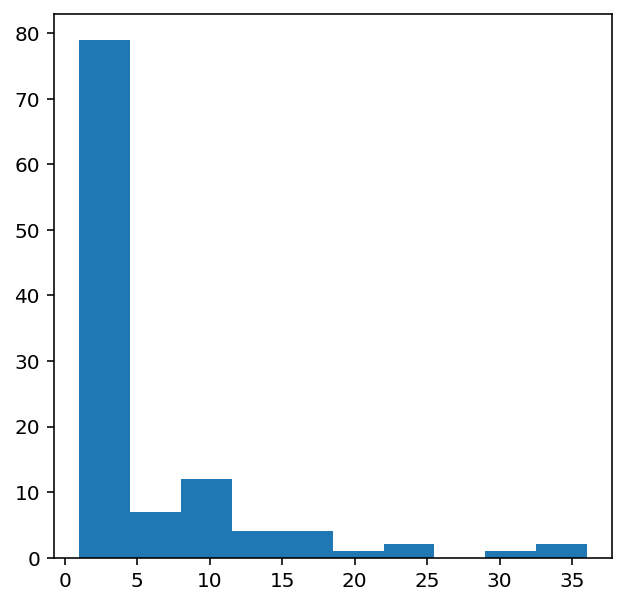

In [75]:
#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [76]:
frequent_notes = [note_ for note_, count in freq.items() if count>=5]
print(len(frequent_notes))

33


In [77]:

new_music=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)            
    new_music.append(temp)
    
new_music = np.array(new_music)

In [78]:
no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)

In [79]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))

In [80]:
#preparing input sequences
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)

In [81]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

In [82]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [83]:
def lstm():
  model = Sequential()
  model.add(LSTM(128,return_sequences=True))
  model.add(LSTM(128))
  model.add(Dense(256))
  model.add(Activation('relu'))
  model.add(Dense(n_vocab))
  model.add(Activation('softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
  return model

In [84]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 100)           3300      
_________________________________________________________________
conv1d (Conv1D)              (None, 32, 64)            19264     
_________________________________________________________________
dropout (Dropout)            (None, 32, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 128)           24704     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 128)            0

In [85]:
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [86]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=50, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])

Epoch 1/50
2/3 [===================>..........] - ETA: 0s - loss: 3.4950
Epoch 00001: val_loss improved from inf to 3.48306, saving model to best_model.h5
3/3 [==============================] - 0s 111ms/step - loss: 3.4921 - val_loss: 3.4831
Epoch 2/50
3/3 [==============================] - ETA: 0s - loss: 3.4598
Epoch 00002: val_loss improved from 3.48306 to 3.46351, saving model to best_model.h5
3/3 [==============================] - 0s 42ms/step - loss: 3.4598 - val_loss: 3.4635
Epoch 3/50
3/3 [==============================] - ETA: 0s - loss: 3.4120
Epoch 00003: val_loss improved from 3.46351 to 3.43167, saving model to best_model.h5
3/3 [==============================] - 0s 43ms/step - loss: 3.4120 - val_loss: 3.4317
Epoch 4/50
2/3 [===================>..........] - ETA: 0s - loss: 3.3506
Epoch 00004: val_loss improved from 3.43167 to 3.41321, saving model to best_model.h5
3/3 [==============================] - 0s 45ms/step - loss: 3.3478 - val_loss: 3.4132
Epoch 5/50
2/3 [=======

Epoch 37/50
3/3 [==============================] - ETA: 0s - loss: 2.1258
Epoch 00037: val_loss did not improve from 3.12306
3/3 [==============================] - 0s 30ms/step - loss: 2.1258 - val_loss: 3.1390
Epoch 38/50
2/3 [===================>..........] - ETA: 0s - loss: 2.1093
Epoch 00038: val_loss did not improve from 3.12306
3/3 [==============================] - 0s 48ms/step - loss: 2.1210 - val_loss: 3.1448
Epoch 39/50
2/3 [===================>..........] - ETA: 0s - loss: 2.0589
Epoch 00039: val_loss did not improve from 3.12306
3/3 [==============================] - 0s 37ms/step - loss: 2.0505 - val_loss: 3.1527
Epoch 40/50
2/3 [===================>..........] - ETA: 0s - loss: 1.9798
Epoch 00040: val_loss did not improve from 3.12306
3/3 [==============================] - 0s 36ms/step - loss: 1.9920 - val_loss: 3.1662
Epoch 41/50
2/3 [===================>..........] - ETA: 0s - loss: 1.9721
Epoch 00041: val_loss did not improve from 3.12306
3/3 [==========================

In [87]:
#loading best model
from keras.models import load_model
model = load_model('best_model.h5')

In [97]:
import random
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]

predictions=[]
for i in range(40):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

[15, 15, 7, 15, 15, 15, 7, 15, 7, 7, 7, 7, 7, 30, 30, 30, 30, 30, 30, 30, 30, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 30, 7, 7, 7, 7, 7, 7]


In [98]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes = [x_int_to_note[i] for i in predictions]

In [99]:
def convert_to_midi(prediction_output):
   
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                
                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Guitar()
                notes.append(new_note)
                
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
            
        # pattern is a note
        else:
            
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Guitar()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='music.mid')

In [100]:
convert_to_midi(predicted_notes)

In [ ]:
c3 = chord.Chord(['B-4', 'D5', 'F5'])
